In [37]:
from ect.tracking import FECTTransformer, FECTCorrTransformer
from ect.helpers import RandomImageGenerator, UnimodalGenerator, MultimodalGenerator, Mode
from ect import Config

import numpy as np
from matplotlib import pyplot as plt

In [38]:
m = [
    # Mode(33, 45, 1/3),
    Mode(35, 45, 1)
]
gen = MultimodalGenerator(m)


# gen = RandomImageGenerator('/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test', 10)

2024-05-15 00:46:03.278 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-05-15 00:46:03.282 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


### FECT Transformer

In [39]:
tr = FECTTransformer(Config(ect_offset_value_px=10), (314, 100))

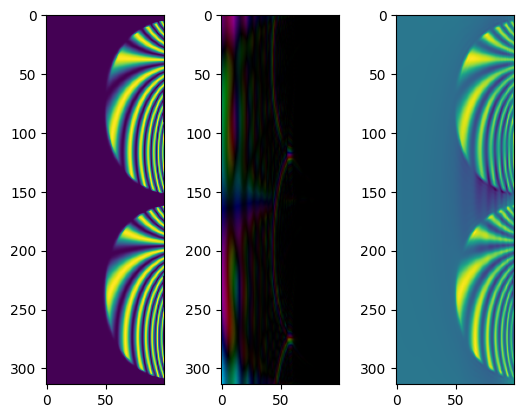

In [40]:
from ect import complex_to_hsv

img = gen.generate()
ect = tr.transform(img, logpolar=False)
inv = tr.invert(ect, logpolar=False)

plt.subplot(1, 3, 1)
plt.imshow(img)

plt.subplot(1, 3, 2)
# plt.imshow(np.abs(ect))
plt.imshow(complex_to_hsv(ect))

plt.subplot(1, 3, 3)
plt.imshow(np.real(inv))

### FECT Corr Transformer

In [41]:
tr = FECTCorrTransformer(Config(), (314, 100))

2024-05-15 00:46:04.059 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-05-15 00:46:04.063 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping
2024-05-15 00:46:04.229 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:78 - Running logpolar transform in offset mode
2024-05-15 00:46:04.232 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


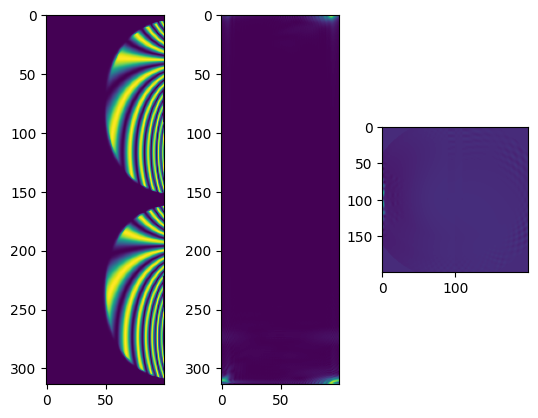

In [42]:
img = gen.generate()
ect = tr.transform(img)
inv = tr.invert(ect)

plt.subplot(1, 3, 1)
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.imshow(np.abs(ect))

plt.subplot(1, 3, 3)
plt.imshow(np.real(inv))